### two types of models can be built in pyomo: concrete and abstract.

### a concrete model is constructed as the problem is developing. therefore, the model data must be specified before the process of model development. python standard data structure can be used to assign the parameters to the model.

### In the abstract model, the model components are defined totally and then the data is assigned to it. pyomo data structure is used in this case (such as param and set). albete, these data structures can be used in the concrete model as well.

In [1]:
import pyomo.environ as pyo

In [2]:
model = pyo.ConcreteModel(name="chap4")

# core modeling components in pyomo:

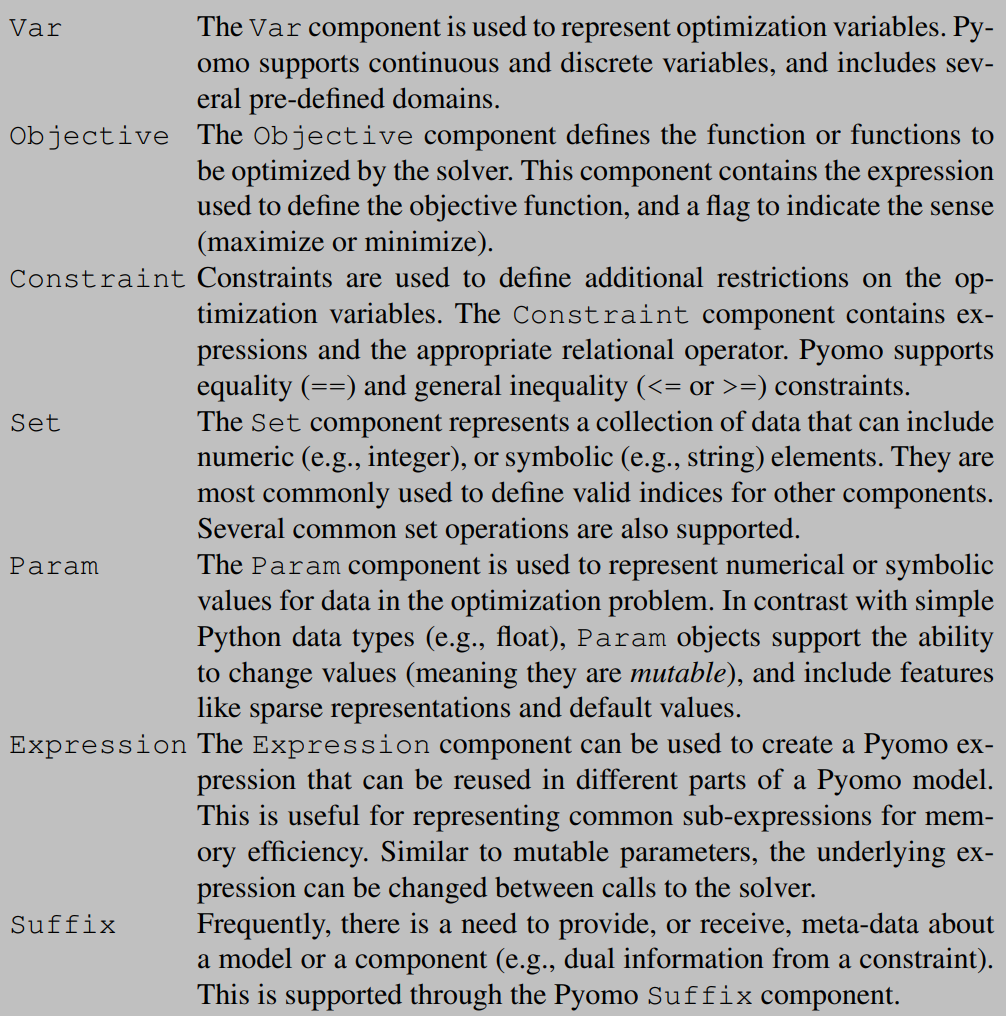

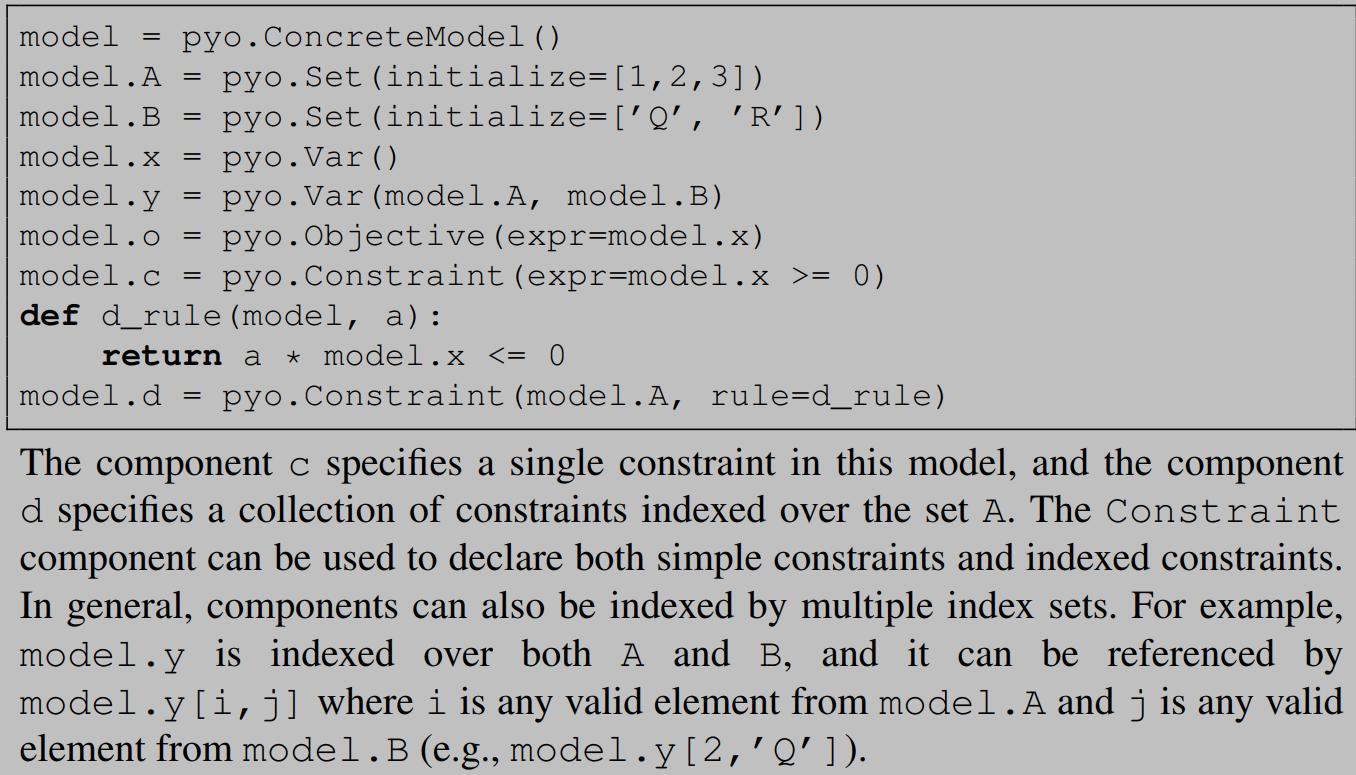

In [5]:
# initialized for a single variable means the initial value of the particular variable is adjusted.

# suppose one wants to specify the initial value of x which is not indexed:
model.x = pyo.Var(initialize = 3.5)

# however, when the variable is indexed there are different optionas:
# o if a single scalar is passed, then the initial value of all the indexed variables are set to be that scalar
# o In many cases, you can also pass a Python dictionary (index-value pairs) where the keys of the dictionary are 
#   valid indices for the component.
# o It is also possible to pass in a Python function to provide the value for every
#   index in the component. We often call these functions rules.

In [6]:
print(model.x)

x


In [7]:
print(pyo.value(model.x))

3.5


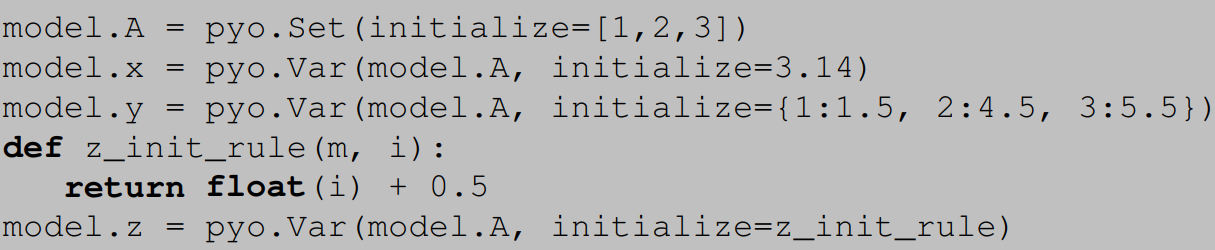

# Var declaration

In [8]:
model.x = pyo.Var()

    'pyomo.core.base.var.ScalarVar'>) on block chap4 with a new Component
    (type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().


In [9]:
print(f"{model.x} = {pyo.value(model.x)}")

ERROR: evaluating object as numeric value: x
        (object: <class 'pyomo.core.base.var.ScalarVar'>)
    No value for uninitialized NumericValue object x


ValueError: No value for uninitialized NumericValue object x

# different arguments are:

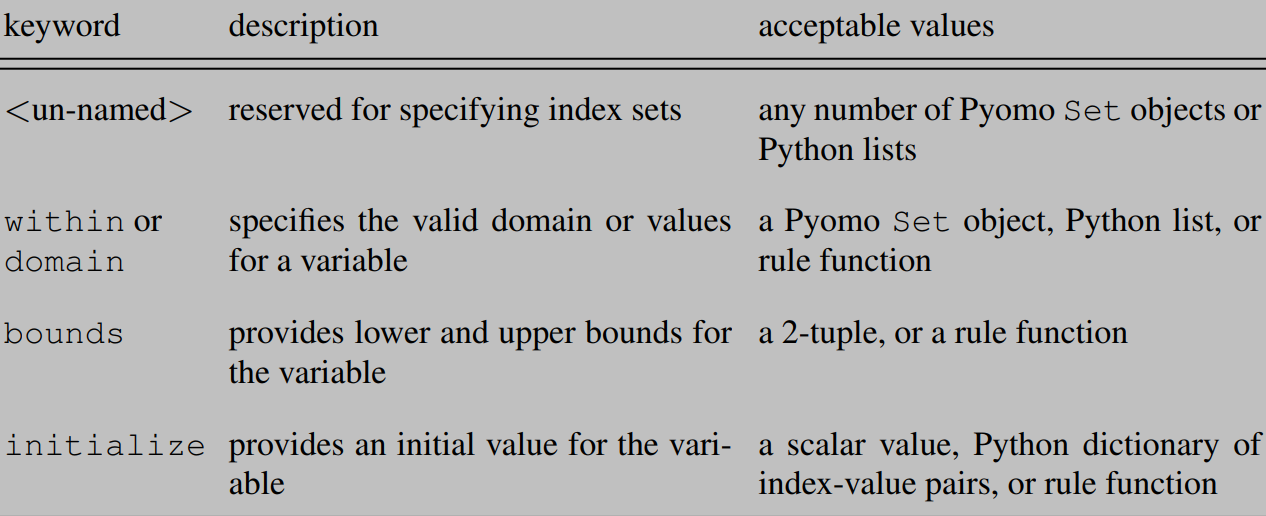

# domain or within

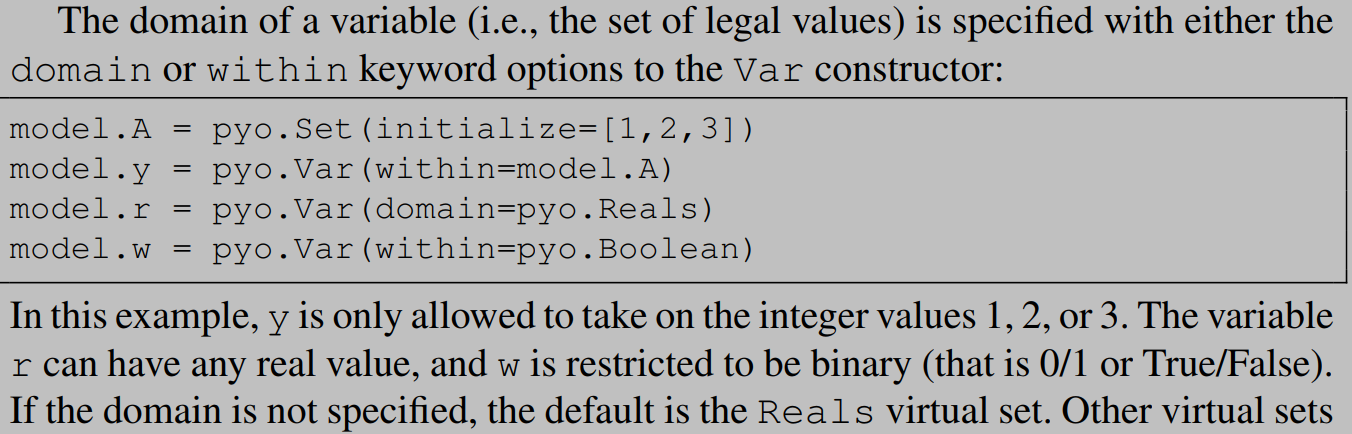

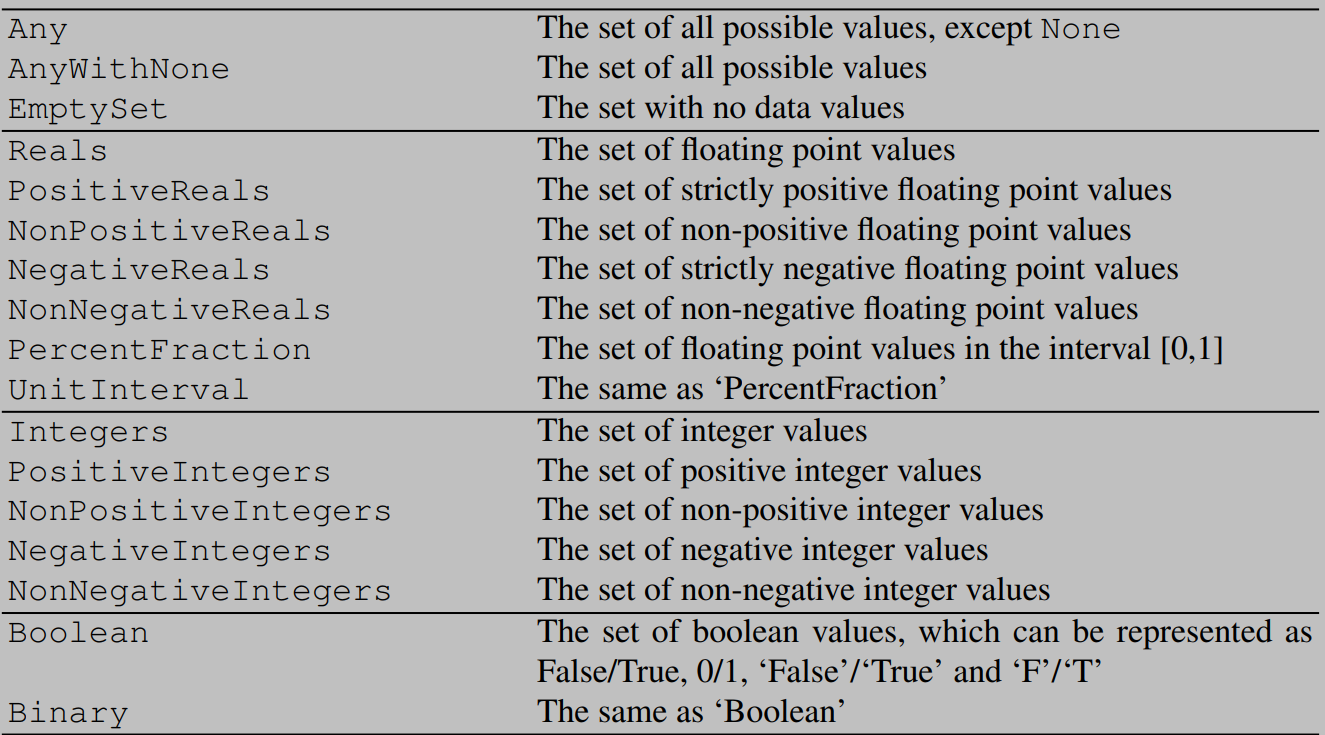

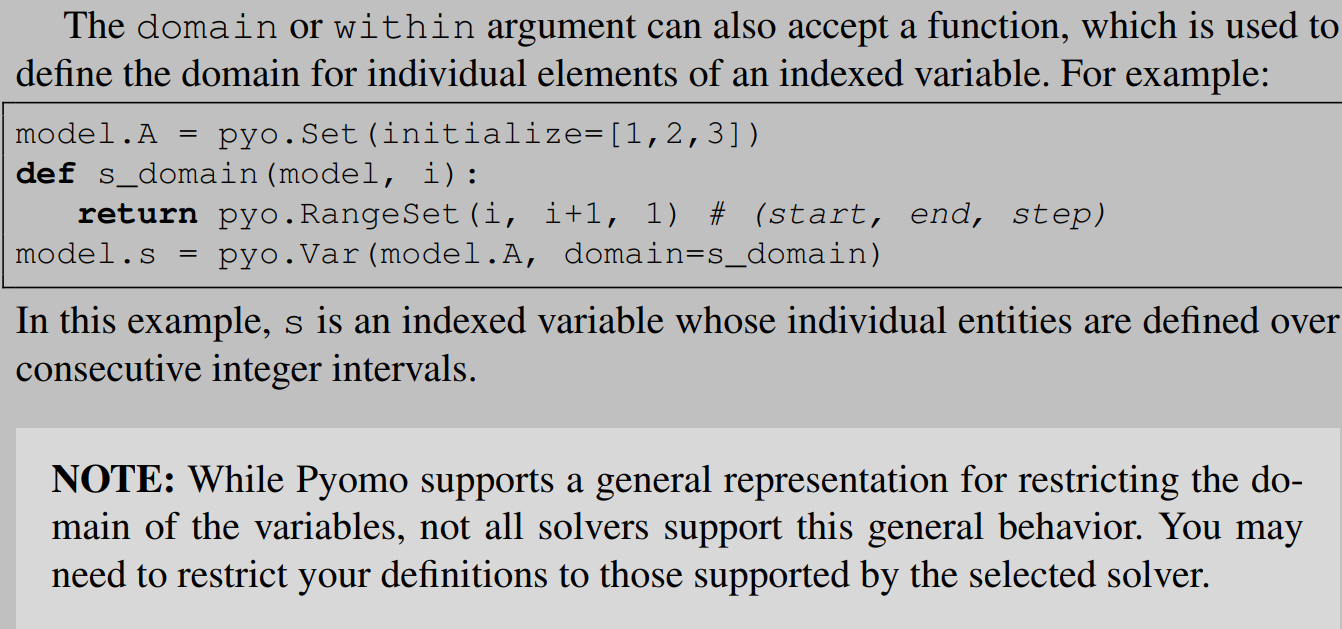

# bounds

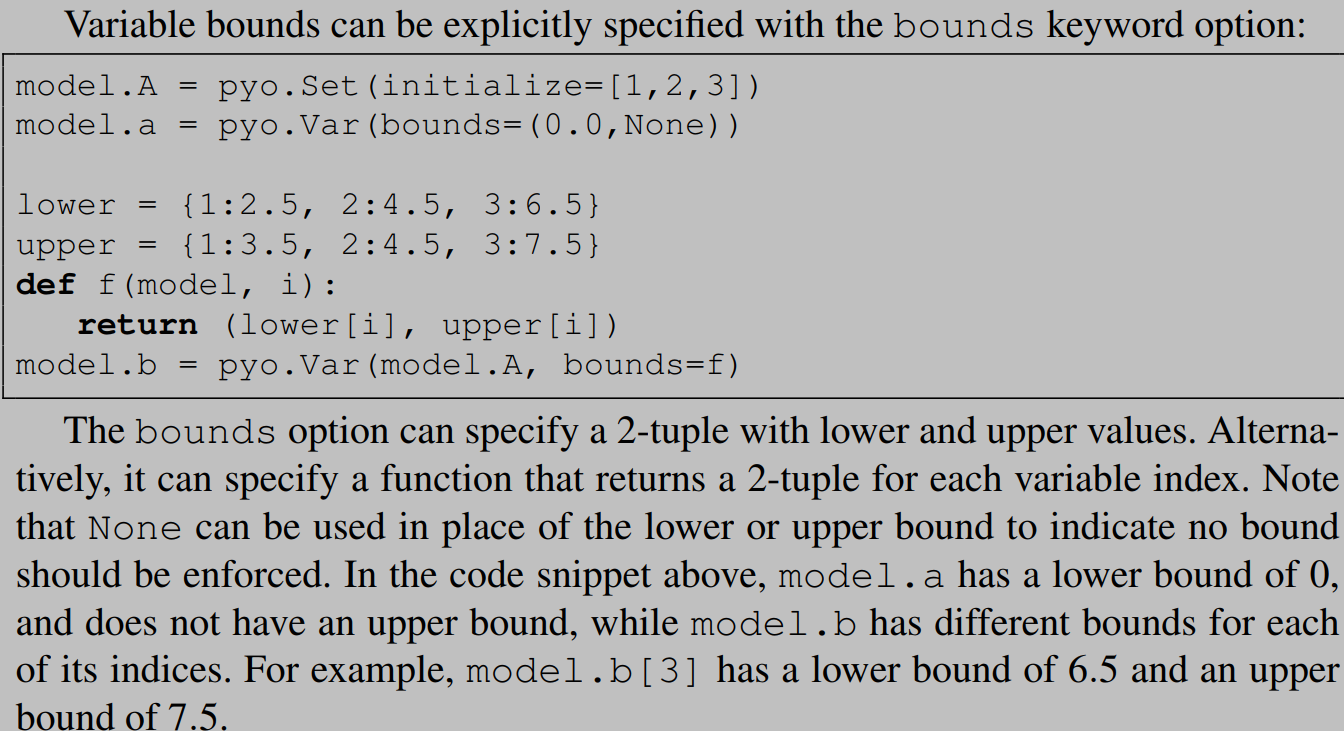

In [19]:
# set
model.A = pyo.Set(initialize = [1,2,3])

# vars
model.za = pyo.Var(initialize = 9, within = pyo.NonNegativeReals)
model.zb = pyo.Var(model.A, initialize = {1:1.5,2:4.5,3:5.5})
model.zc = pyo.Var(model.A, initialize = 2.1)

def g(model,i):
    return 3*i
model.zd = pyo.Var(model.A,initialize = g)

# print
print(pyo.value(model.za))
print(pyo.value(model.zb[1]))
print(pyo.value(model.zc[3]))
print(pyo.value(model.zd[3]))

    'pyomo.core.base.set.OrderedScalarSet'>) on block chap4 with a new
    Component (type=<class 'pyomo.core.base.set.AbstractOrderedScalarSet'>).
    This is usually indicative of a modelling error. To avoid this warning,
    use block.del_component() and block.add_component().
    'pyomo.core.base.var.ScalarVar'>) on block chap4 with a new Component
    (type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.var.IndexedVar'>) on block chap4 with a new Component
    (type=<class 'pyomo.core.base.var.IndexedVar'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.var.IndexedVar'>) on block chap4 with a new Component
    (type=<class 'pyomo.core.base.var.IndexedVar'>). This is usually
    indicative of a modelling error. To avoid t

# access the lower and upper bounds of a value:

In [23]:
print(model.za.lb)
print(model.za.ub)

0
None


In [24]:
print(model.zb.lb)

AttributeError: 'IndexedVar' object has no attribute 'lb'

In [25]:
print(model.zb.ub)

AttributeError: 'IndexedVar' object has no attribute 'ub'

In [32]:
model.zb[1].setlb(-1)
model.zb[1].setub(20)

In [33]:
print(model.zb[1].lb)
print(model.zb[1].ub)

-1
20


# fix the value of a variable

In [34]:
model.zb.fix(3.0)

print(model.zb[1].fixed)
print(model.zb[2].fixed)
print(model.zb[3].fixed)

True
True
True


In [35]:
model.zc[2].fix(7.0)
print(model.zc[1].fixed)
print(model.zc[2].fixed)
print(model.zc[3].fixed)

False
True
False


# objective function

In [3]:
model.obj = pyo.Objective()

# common declarations are:
# o expr, for instance: expr = model.x1 + model.x2
# o rule: a function which defines the OF
# o sense: specifies whether an objective is minimized or maximized. sense = pyo.maximize

In [4]:
model.x = pyo.Var([1,2], initialize = 1)

model.obj1 = pyo.Objective(expr = model.x[1] + 2*model.x[2], sense = pyo.maximize)

def obj2_rule(model):
    return model.x[1] + 2 * model.x[2]
model.obj2 = pyo.Objective(rule = obj2_rule)

In [5]:
# define multi-objective problem with a set
A = ['a','b','c']
model.y = pyo.Var(A, initialize = 1.0)

def obj3_rule(model, i):
    if i == 'a':
        pyo.Objective.Skip
    return model.y[i]**2
model.obj3 = pyo.Objective(A, rule = obj3_rule)

In [6]:
print(model.obj1.expr)
print(model.obj2.expr)
print(model.obj3.expr)

x[1] + 2*x[2]
x[1] + 2*x[2]


AttributeError: 'IndexedObjective' object has no attribute 'expr'

In [8]:
print(model.obj1.sense) # -1 => maximize
print(model.obj2.sense) # 1 => minimize

-1
1


In [9]:
print(pyo.value(model.obj1))

3


# constraint

In [10]:
# define a constraint with expr
model.diff = pyo.Constraint(expr = model.x[2] - model.x[1] <= 7.5)

In [11]:
# define the constraint with function
def diff_rule(model):
    return model.x[2] - model.x[1] <= 7.5
model.diff1 = pyo.Constraint(rule=diff_rule)

In [12]:
# use set to define a constraint
N = [1,2,3]

model.k = pyo.Var(N, within = pyo.NonNegativeReals, initialize = 0.0)

a = {1:1,2:3.1,3:4.5}
b = {1:1,2:2.9,3:3.1}
def con1_rule(model, i):
    #if i == 3:
        #return pyo.Constraint.Skip or Constraint.NoConstraint
    #else:
    return a[i] + model.k[i] >= b[i]
model.con1 = pyo.Constraint(N, rule = con1_rule)

In [16]:
for i in N:
    print(model.con1[i].expr)

1  <=  1 + k[1]
2.9  <=  3.1 + k[2]
3.1  <=  4.5 + k[3]


# work with constraints

In [30]:
model1 = pyo.ConcreteModel(name = 'Model_1')

model1.x = pyo.Var(initialize=1.0)
model1.y = pyo.Var(initialize=1.0)
model1.c1 = pyo.Constraint(expr = model1.y - model1.x <= 7.5)
model1.c2 = pyo.Constraint(expr = -2.5 <= model1.y - model1.x)
model1.c3 = pyo.Constraint(expr = pyo.inequality(-3.0, model1.y - model1.x, 7.0))

In [31]:
print(pyo.value(model1.c1.body)) # 0.0
print(model1.c1.lslack()) # inf
print(model1.c1.uslack()) # 7.5
print(model1.c2.lslack()) # 2.5
print(model1.c2.uslack()) # inf
print(model1.c3.lslack()) # 3.0
print(model1.c3.uslack()) # 7.0

0.0
inf
7.5
2.5
inf
3.0
7.0


# Set

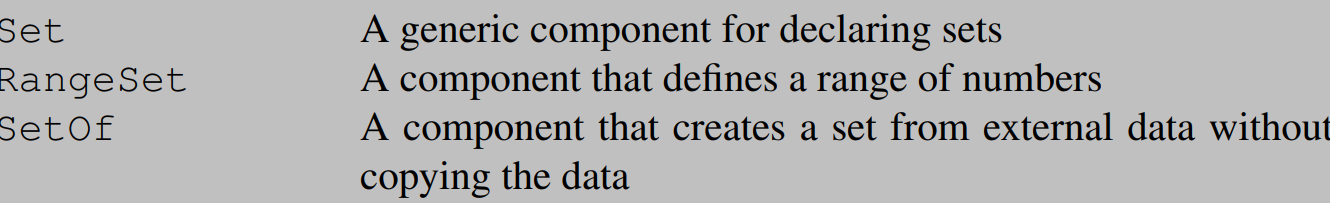

In [32]:
model.Aset = pyo.Set()

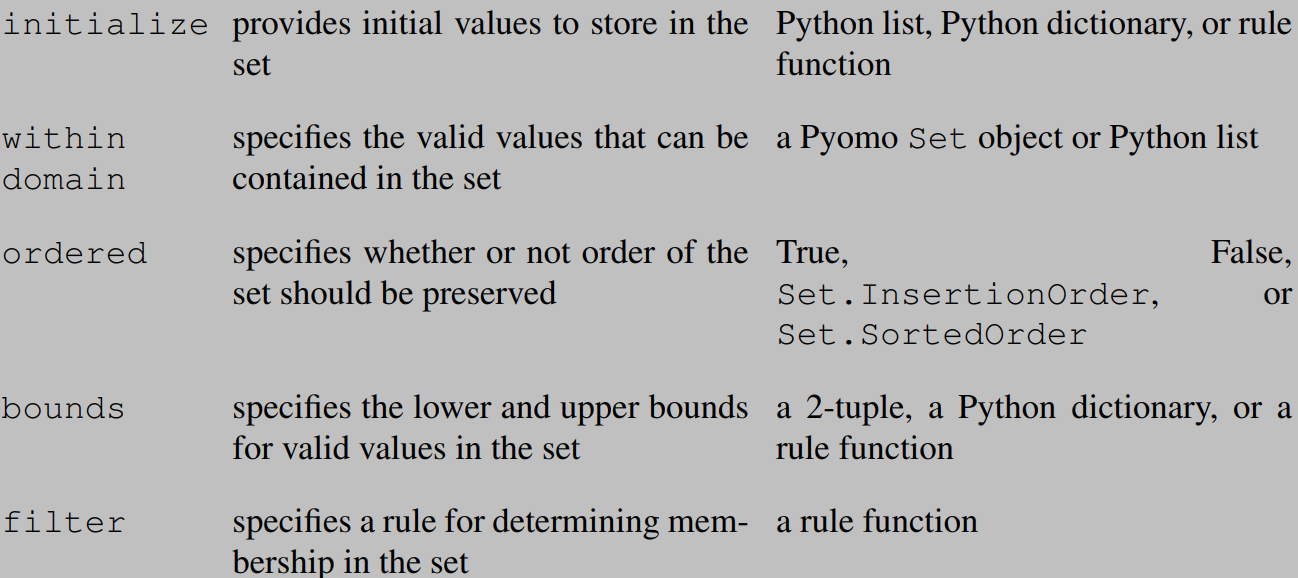

In [34]:
model.Bset = pyo.Set(initialize = [1,2,3])

In [ ]:
model.A = pyo.Set([1,2,3,4,5,6,7,8,9])
model.B = pyo.Set([4,5,6])
model.G = model.A | model.B # set union
model.H = model.B & model.A # set intersection
model.I = model.A - model.B # set difference
model.J = model.A ˆ model.B # set exclusive-or
model.K = model.A * model.B # set cross-products 

In [ ]:
model.P = pyo.Set(initialize=[1,2,3,5,7])
def filter_rule(model, x):
    return x not in model.P
model.Q = pyo.Set(initialize=range(1,10), filter=filter_rule)

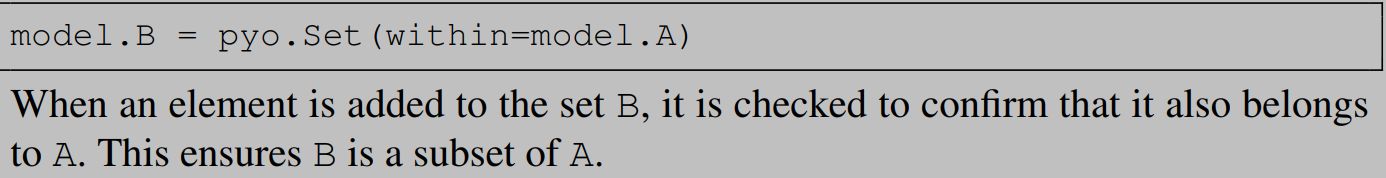

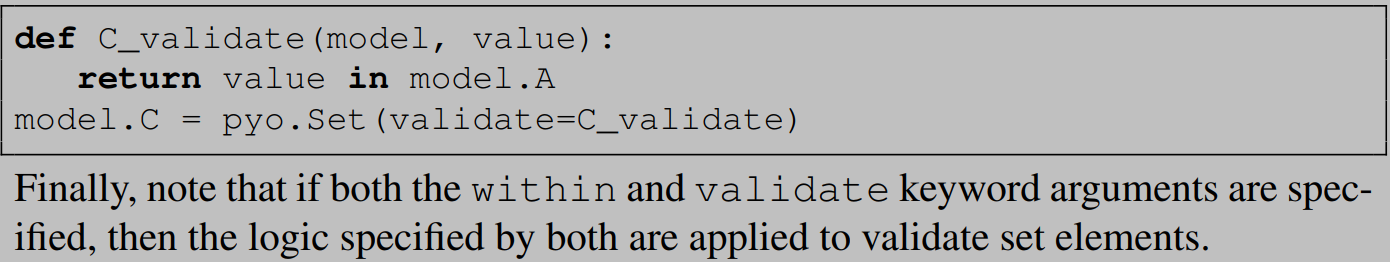

In [ ]:
model.A = pyo.Set(ordered=pyo.Set.SortedOrder)

# RangeSet

If a RangeSet is defined with a single argument, then the argument defines the final value. The start value defaults to 1 and the step size defaults to 1. For example, the following defines a sequence of integers from 1 to 10

In [36]:
model.A = pyo.RangeSet(10)

In [37]:
print(len(model.A))

10


In [38]:
print(type(model.A.data()) is tuple)

True


In [47]:
print(model.A.data())
print(sorted(model.A.data()))
print(list(e for e in model.A))

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


True


In [45]:
# Test if an element is in the set
print(1 in model.A) # True

# Test if sets are equal
print([1, 2] == model.A) # False

# Test if sets are not equal
print([1, 2] != model.A) # True

# Test if a set is a subset of or equal to the set
print([1, 2] <= model.A) # True

# Test if a set is a subset of the set
print([1, 2] < model.A) # True

# Test if a set is a superset of the set
print([1, 2, 3] > model.A) # False

# Test if a set is a superset of or equal to the set
print([1, 2, 3] >= model.A) # True

False
True
True
True
False
False


If a RangeSet is defined with two arguments, then the first is the start value and the second is the final value. 
For example, the following defines a sequence of integers from 5 to 10

In [ ]:
model.C = pyo.RangeSet(5,10)

Finally, if a RangeSet is defined with three arguments, then they are the start value, final value and step size
respectively. For example, the following defines a sequence of floating point values from 2:5 to 10:0 with step 1:5

In [ ]:
model.D = pyo.RangeSet(2.5,11,1.5)

# ordered sets

In [48]:
model.A = pyo.Set(initialize=[3, 2, 1], ordered=True)
print(model.A.first()) # 3
print(model.A.last()) # 1
print(model.A.next(2)) # 1
print(model.A.prev(2)) # 3
print(model.A.nextw(1)) # 3
print(model.A.prevw(3)) # 1

    'pyomo.core.base.set.FiniteScalarRangeSet'>) on block chap4 with a new
    Component (type=<class 'pyomo.core.base.set.AbstractOrderedScalarSet'>).
    This is usually indicative of a modelling error. To avoid this warning,
    use block.del_component() and block.add_component().
3
1
1
3
3
1


In [49]:
print(model.A.data())

(3, 2, 1)


In [50]:
print(model.A.ord(3)) # 1
print(model.A.ord(1)) # 3
print(model.A[1]) # 3
print(model.A[3]) # 1

1
3
    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in (or after) 7.0) (called from <ipython-
    input-50-0d73fe5ace65>:3)
3
    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in (or after) 7.0) (called from <ipython-
    input-50-0d73fe5ace65>:4)
1


# Param

In [ ]:
model.Z = pyo.Param()

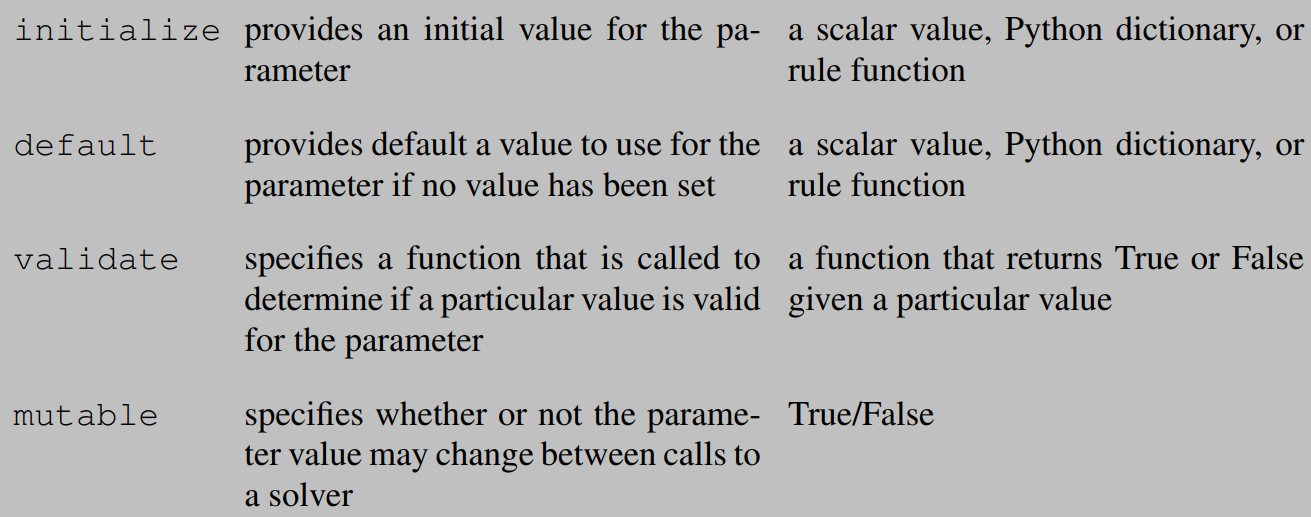

In [51]:
# initialize with dict

model.A = pyo.Set(initialize=[1,2,3])
model.B = pyo.Set(initialize=["A","B"])
model.U = pyo.Param(model.A, initialize={1:10, 2:20, 3:30})
model.T = pyo.Param(model.A, model.B, initialize={(1,"A"):10, (2,"B"):20, (3,"A"):30})

    'pyomo.core.base.set.OrderedScalarSet'>) on block chap4 with a new
    Component (type=<class 'pyomo.core.base.set.AbstractOrderedScalarSet'>).
    This is usually indicative of a modelling error. To avoid this warning,
    use block.del_component() and block.add_component().


In [58]:
print(len(model.U))
print(2 in model.U)
print([p for p in model.U])

3
True
[1, 2, 3]


In [54]:
# initialize with func

def X_init(model, i, j):
    return i*j
model.X = pyo.Param(model.A, model.A, initialize=X_init)

In [55]:
# for ordered sets, previous params can be used
def XX_init(model, i, j):
    if i==1 or j==1:
        return i*j
    return i*j + model.XX[i-1,j-1]
model.XX = pyo.Param(model.A, model.A, initialize=XX_init)

In [ ]:
# use of default

u={}
u[1,1] = 10
u[2,2] = 20
u[3,3] = 30
model.U = pyo.Param(model.A, model.A, initialize=u, default=0)

In [ ]:
# param domain and validation

model.Z = pyo.Param(within=pyo.Reals)

def Y_validate(model, value):
    return value in pyo.Reals
model.Y = pyo.Param(validate=Y_validate)

# define a sample OF

In [61]:
#              x1 + 4 * x2 + 9 * x3

model = pyo.ConcreteModel()
p = {1:1, 2:4, 3:9}
model.A = pyo.Set(initialize=[1,2,3])
model.p = pyo.Param(model.A, initialize=p)
model.x = pyo.Var(model.A, within=pyo.NonNegativeReals)
model.o = pyo.Objective(expr= sum(model.p[i]*model.x[i] for i in model.A) )

In [63]:
print(model.A.data())
print([e for e in model.p])
print(model.o.expr)

(1, 2, 3)
[1, 2, 3]
x[1] + 4*x[2] + 9*x[3]
